In [1]:
#the notebook to the best weights was lost due to some issues but the entirety of the notebook is as follows
!pip install ultralytics==8.0.20
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 26.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled opencv-python-headless-4.8.0.76
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cyc

In [2]:
import ultralytics
from ultralytics import YOLO
from IPython.display import Image, display
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5359.5/8062.4 GB disk)


In [4]:
#creating a directory for the dataset
!mkdir 'datasets'


In [ ]:
'''calling the dataset from roboflow,the collection,creation and labeling of this dataset was a private work of me for over a month.
For further inquiries reharding access to the dataset,paid partnerships etc... feel free to contact me'''

%cd '/kaggle/working/datasets'


from roboflow import Roboflow
rf = Roboflow(api_key="xxxxxxxxxxxxxxxx")
project = rf.workspace("xxxxx").project("xxxxxxxx")
dataset = project.version(4).download("yolov8")


In [6]:
!yolo task=detect mode=train model=yolov8s.pt data='/kaggle/working/datasets/Shahrdari-Object-Detection-4/data.yaml' epochs=100 imgsz=1080 plots=True

100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 194MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/kaggle/working/datasets/Shahrdari-Object-Detection-4/data.yaml, epochs=100, patience=50, batch=16, imgsz=1080, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None,

In [7]:
!ls '/kaggle/working/datasets/runs/detect/train'

F1_curve.png					   train_batch11160.jpg
PR_curve.png					   train_batch11161.jpg
P_curve.png					   train_batch11162.jpg
R_curve.png					   train_batch2.jpg
args.yaml					   val_batch0_labels.jpg
confusion_matrix.png				   val_batch0_pred.jpg
events.out.tfevents.1706399138.84b42b83cd65.105.0  val_batch1_labels.jpg
results.csv					   val_batch1_pred.jpg
results.png					   val_batch2_labels.jpg
train_batch0.jpg				   val_batch2_pred.jpg
train_batch1.jpg				   weights


In [8]:
%cd {HOME}

!yolo task=detect mode=val model='/kaggle/working/datasets/runs/detect/train/weights/best.pt' data='/kaggle/working/datasets/Shahrdari-Object-Detection-4/data.yaml'

[Errno 2] No such file or directory: '{HOME}'
/kaggle/working/datasets
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/datasets/Shahrdari-Object-Detection-4/valid/labels
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        224        471      0.732      0.669      0.712      0.413
Speed: 3.3ms pre-process, 13.3ms inference, 0.0ms loss, 2.8ms post-process per image


In [9]:
!yolo task=detect mode=predict model='/kaggle/working/datasets/runs/detect/train/weights/best.pt' conf=0.25 source='/kaggle/input/shahr-dari/' save=True

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/9 /kaggle/input/shahr-dari/trash_shahr1.jpg: 640x1088 65.7ms
image 2/9 /kaggle/input/shahr-dari/trash_shahr2.jpg: 1088x640 1 Trash, 65.8ms
image 3/9 /kaggle/input/shahr-dari/trash_shahr3.jpg: 1088x640 10.5ms
image 4/9 /kaggle/input/shahr-dari/trash_shahr4.jpg: 1088x640 1 Trash, 10.5ms
image 5/9 /kaggle/input/shahr-dari/trash_shahr5.jpg: 1088x640 3 Trashs, 10.5ms
image 6/9 /kaggle/input/shahr-dari/trash_shahr6.jpg: 1088x640 3 Trashs, 10.5ms
image 7/9 /kaggle/input/shahr-dari/trash_shahr7.jpg: 1088x640 2 Trashs, 10.5ms
image 8/9 /kaggle/input/shahr-dari/trash_shah

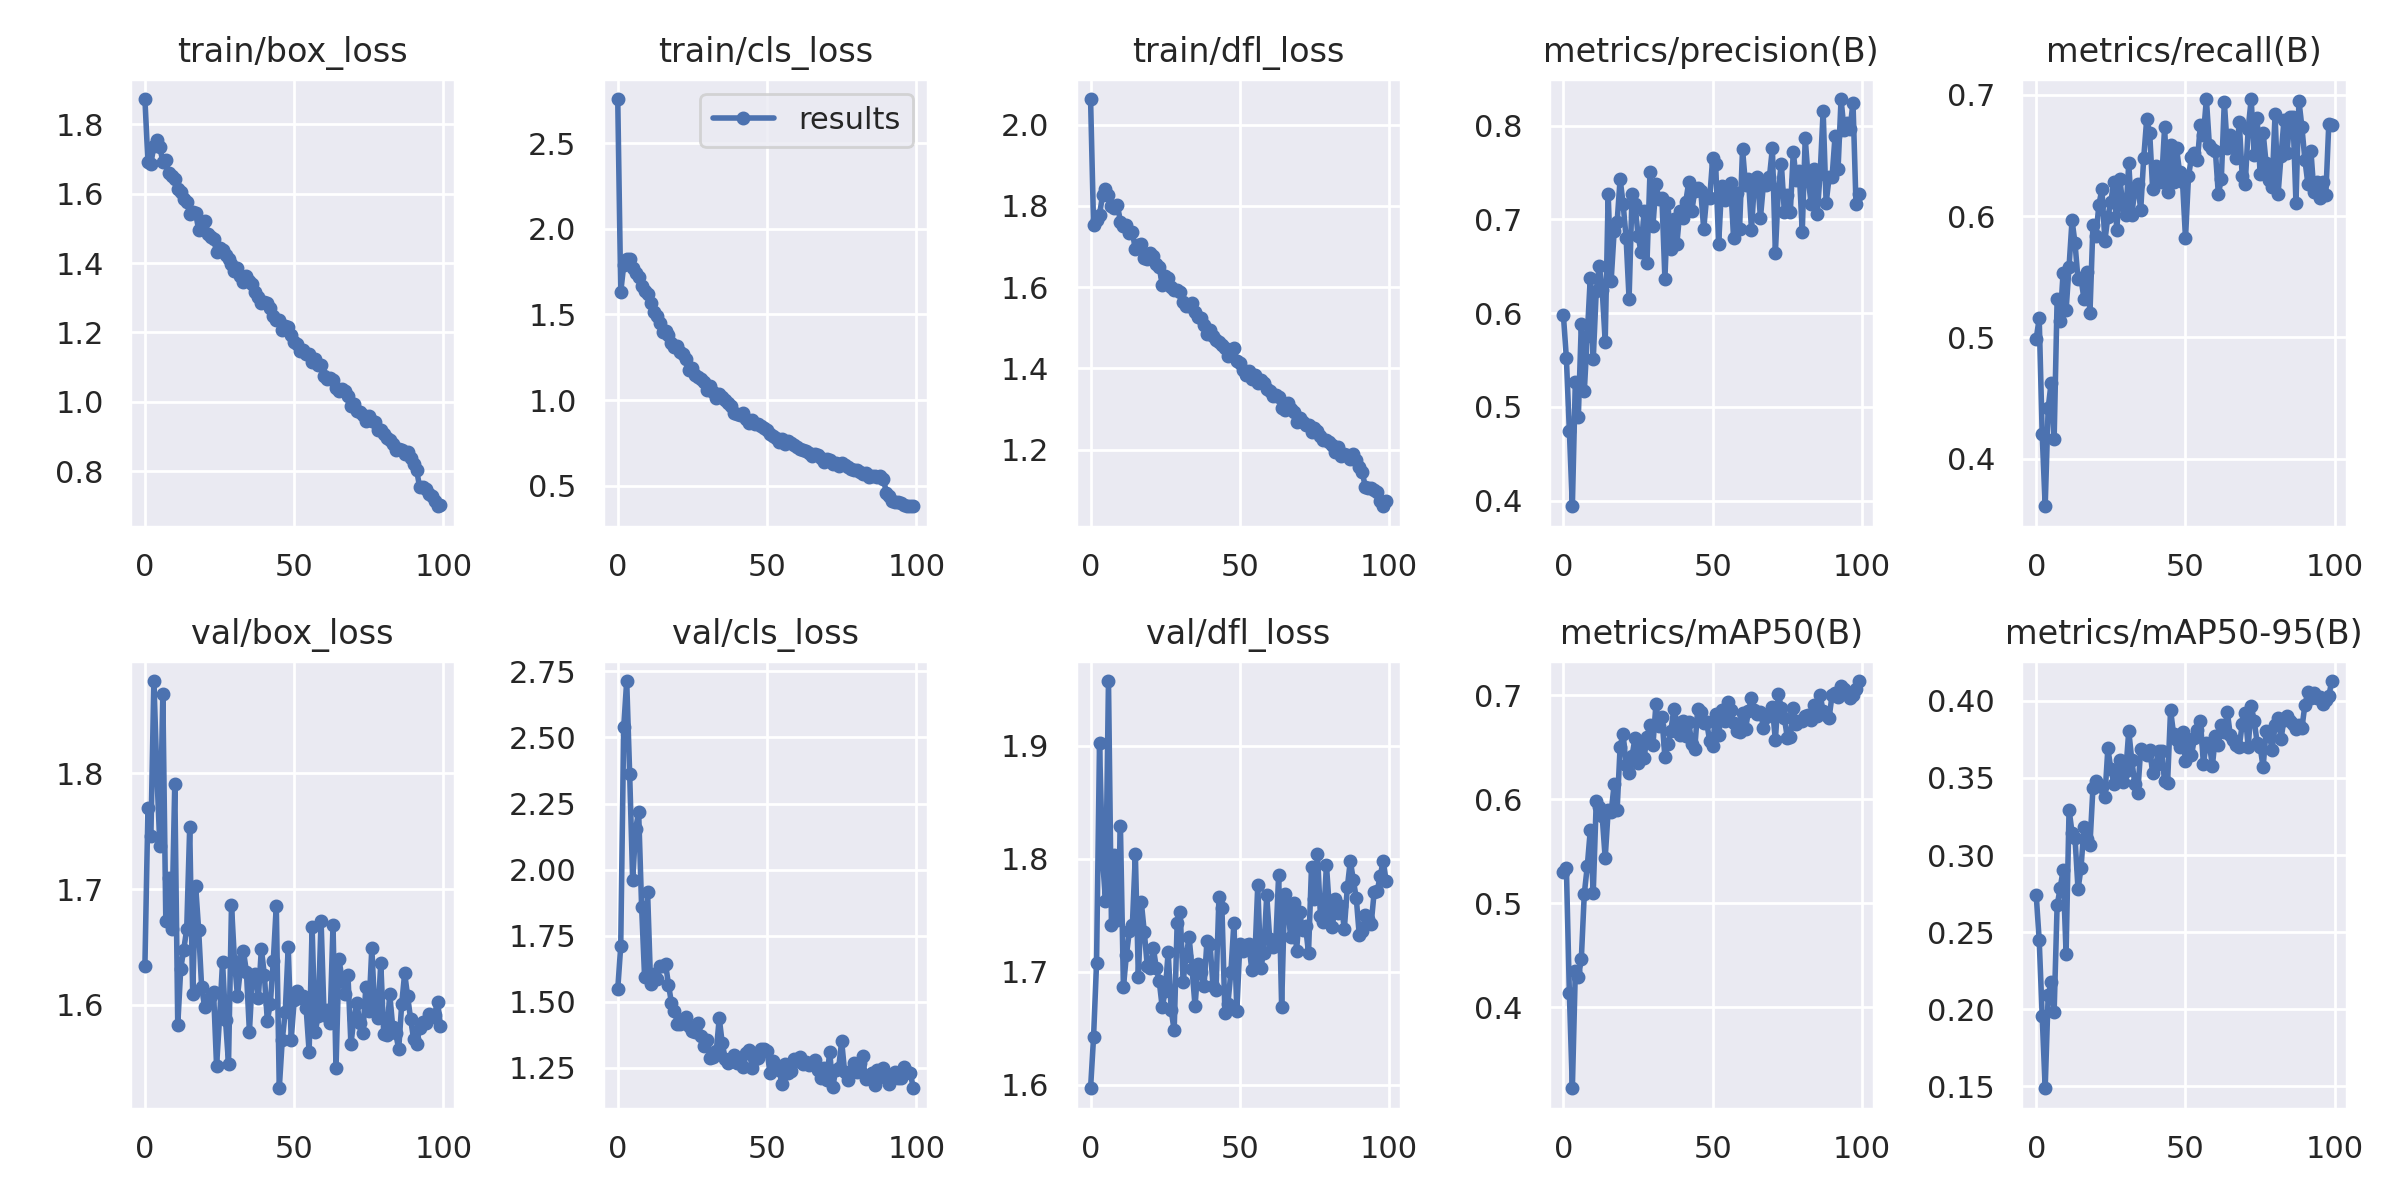

In [49]:
#I will share the results of best weights on readme file
Image(filename=f'/kaggle/working/datasets/runs/detect/train/results.png', width=600)

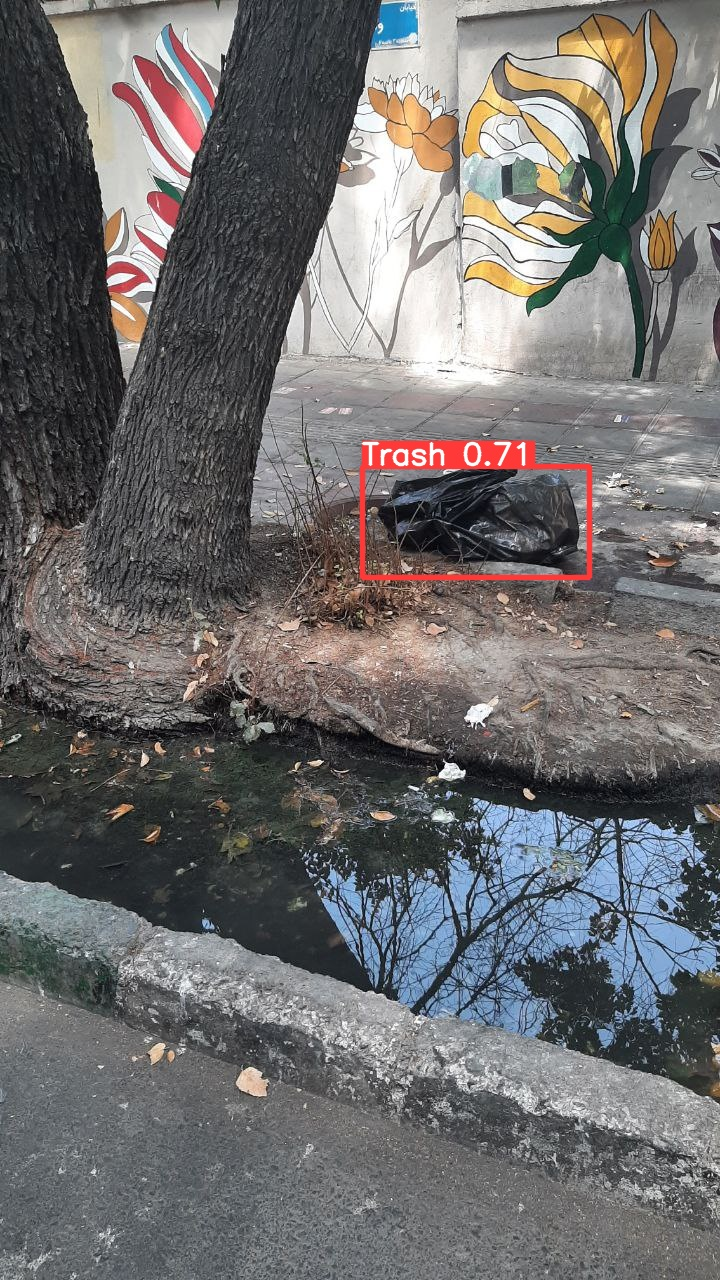

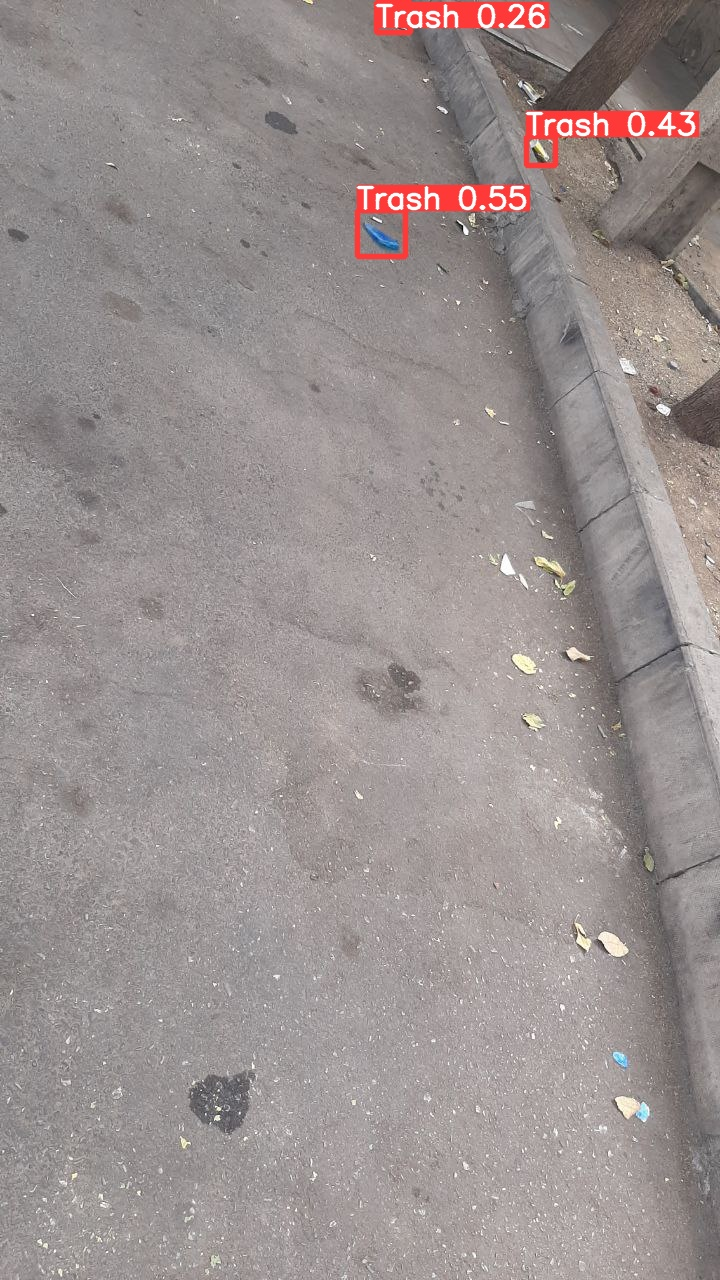

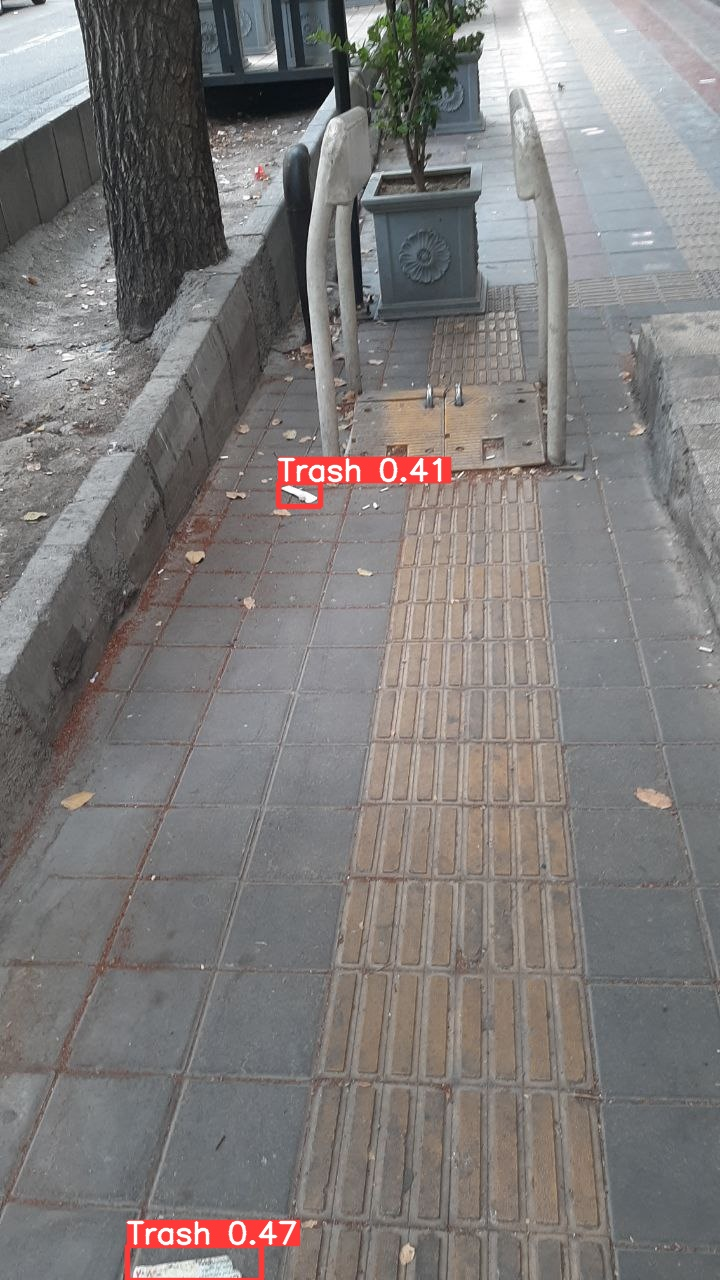

In [46]:
import glob

# Get a list of image paths
image_paths = glob.glob(f'/kaggle/working/datasets/runs/detect/predict/*.jpg')

# Display some of the images
indices_to_display = [2,3,6] 
for index in indices_to_display:
    if 0 <= index < len(image_paths):
        display(Image(filename=image_paths[index], width=600))
        print("\n")


Deployment

In [ ]:
#you can also deploy your model to roboflow but i refrain from running this line to avoid any problems on my end
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")